In [2]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [3]:
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [5]:
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    stock_data_specific = stock_data[stock_data.Date <= '2021--06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date, infer_datetime_format=True), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date, infer_datetime_format=True), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False, height=900, title=stock, xaxis_rangeslider_visible=True)
    fig.show()

In [6]:
import yfinance as yf

# Create a Ticker object for Tesla
tesla = yf.Ticker("TSLA")

# Print some basic information about Tesla
print(tesla.info)

{'address1': '1 Tesla Road', 'city': 'Austin', 'state': 'TX', 'zip': '78725', 'country': 'United States', 'phone': '512 516 8177', 'website': 'https://www.tesla.com', 'industry': 'Auto Manufacturers', 'industryKey': 'auto-manufacturers', 'industryDisp': 'Auto Manufacturers', 'sector': 'Consumer Cyclical', 'sectorKey': 'consumer-cyclical', 'sectorDisp': 'Consumer Cyclical', 'longBusinessSummary': 'Tesla, Inc. designs, develops, manufactures, leases, and sells electric vehicles, and energy generation and storage systems in the United States, China, and internationally. The company operates in two segments, Automotive, and Energy Generation and Storage. The Automotive segment offers electric vehicles, as well as sells automotive regulatory credits; and non-warranty after-sales vehicle, used vehicles, body shop and parts, supercharging, retail merchandise, and vehicle insurance services. This segment also provides sedans and sport utility vehicles through direct and used vehicle sales, a n

In [7]:
import yfinance as yf

# Create a Ticker object for Tesla
tesla = yf.Ticker("TSLA")

# Extract stock information for Tesla with the period set to "max"
tesla_data = tesla.history(period="max")

# Display the first few rows of the DataFrame
print(tesla_data.head())

                               Open      High       Low     Close     Volume  \
Date                                                                           
2010-06-29 00:00:00-04:00  1.266667  1.666667  1.169333  1.592667  281494500   
2010-06-30 00:00:00-04:00  1.719333  2.028000  1.553333  1.588667  257806500   
2010-07-01 00:00:00-04:00  1.666667  1.728000  1.351333  1.464000  123282000   
2010-07-02 00:00:00-04:00  1.533333  1.540000  1.247333  1.280000   77097000   
2010-07-06 00:00:00-04:00  1.333333  1.333333  1.055333  1.074000  103003500   

                           Dividends  Stock Splits  
Date                                                
2010-06-29 00:00:00-04:00        0.0           0.0  
2010-06-30 00:00:00-04:00        0.0           0.0  
2010-07-01 00:00:00-04:00        0.0           0.0  
2010-07-02 00:00:00-04:00        0.0           0.0  
2010-07-06 00:00:00-04:00        0.0           0.0  


In [8]:
# Extract stock information for Tesla with the period set to "max"
tesla_data = tesla.history(period="max")

# Reset the index of the DataFrame
tesla_data.reset_index(inplace=True)

# Display the first five rows of the DataFrame
print(tesla_data.head())

                       Date      Open      High       Low     Close  \
0 2010-06-29 00:00:00-04:00  1.266667  1.666667  1.169333  1.592667   
1 2010-06-30 00:00:00-04:00  1.719333  2.028000  1.553333  1.588667   
2 2010-07-01 00:00:00-04:00  1.666667  1.728000  1.351333  1.464000   
3 2010-07-02 00:00:00-04:00  1.533333  1.540000  1.247333  1.280000   
4 2010-07-06 00:00:00-04:00  1.333333  1.333333  1.055333  1.074000   

      Volume  Dividends  Stock Splits  
0  281494500        0.0           0.0  
1  257806500        0.0           0.0  
2  123282000        0.0           0.0  
3   77097000        0.0           0.0  
4  103003500        0.0           0.0  


In [9]:
import requests

# URL of the webpage to download
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"

# Send a GET request to the URL
response = requests.get(url)

# Check if the request was successful (status code 200)
if response.status_code == 200:
    # Save the text of the response as html_data
    html_data = response.text
    print("Webpage downloaded successfully.")
else:
    print("Failed to download webpage. Status code:", response.status_code)


Webpage downloaded successfully.


In [10]:
from bs4 import BeautifulSoup

# Parse the HTML data using BeautifulSoup
soup = BeautifulSoup(html_data, 'html.parser')

# Now you can work with the parsed HTML content using BeautifulSoup methods
# For example, you can print the title of the webpage
print("Title of the webpage:", soup.title)

Title of the webpage: <title>Tesla Revenue 2010-2022 | TSLA | MacroTrends</title>


In [16]:
import pandas as pd
from bs4 import BeautifulSoup
import requests

# URL of the webpage to download
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"

# Send a GET request to the URL
response = requests.get(url)

# Check if the request was successful (status code 200)
if response.status_code == 200:
    # Parse the HTML data using BeautifulSoup
    soup = BeautifulSoup(response.text, 'html.parser')
    
    # Isolate the table containing Tesla revenue data
    table = soup.find_all("tbody")[1]
    
    # Extract data from the table
    data = []
    for row in table.find_all('tr'):
        row_data = [cell.get_text(strip=True) for cell in row.find_all(['th', 'td'])]
        if len(row_data) == 2:
            data.append(row_data)

    # Create a DataFrame
    tesla_revenue = pd.DataFrame(data, columns=['Date', 'Revenue'])
    
    print("DataFrame created successfully.")
else:
    print("Failed to download webpage. Status code:", response.status_code)


DataFrame created successfully.


In [17]:
tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace(',|\$',"")

In [18]:
tesla_revenue.dropna(inplace=True)

tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]

In [19]:
print(tesla_revenue.tail())

          Date Revenue
48  2010-09-30     $31
49  2010-06-30     $28
50  2010-03-31     $21
52  2009-09-30     $46
53  2009-06-30     $27


In [20]:
import yfinance as yf

# Create a Ticker object for GameStop
gme = yf.Ticker("GME")

# Print some basic information about GameStop
print(gme.info)

{'address1': '625 Westport Parkway', 'city': 'Grapevine', 'state': 'TX', 'zip': '76051', 'country': 'United States', 'phone': '817 424 2000', 'website': 'https://www.gamestop.com', 'industry': 'Specialty Retail', 'industryKey': 'specialty-retail', 'industryDisp': 'Specialty Retail', 'sector': 'Consumer Cyclical', 'sectorKey': 'consumer-cyclical', 'sectorDisp': 'Consumer Cyclical', 'longBusinessSummary': 'GameStop Corp., a specialty retailer, provides games and entertainment products through its stores and ecommerce platforms in the United States, Canada, Australia, and Europe. The company sells new and pre-owned gaming platforms; accessories, such as controllers, gaming headsets, and virtual reality products; new and pre-owned gaming software; and in-game digital currency, digital downloadable content, and full-game downloads. It sells collectibles comprising apparel, toys, trading cards, gadgets, and other retail products for pop culture and technology enthusiasts, as well as engages 

In [21]:
import yfinance as yf

# Create a Ticker object for GameStop
gme = yf.Ticker("GME")

# Extract stock information for GameStop with the period set to "max"
gme_data = gme.history(period="max")

# Display the first few rows of the DataFrame
print(gme_data.head())

                               Open      High       Low     Close    Volume  \
Date                                                                          
2002-02-13 00:00:00-05:00  1.620128  1.693350  1.603296  1.691666  76216000   
2002-02-14 00:00:00-05:00  1.712707  1.716074  1.670626  1.683250  11021600   
2002-02-15 00:00:00-05:00  1.683250  1.687458  1.658002  1.674834   8389600   
2002-02-19 00:00:00-05:00  1.666418  1.666418  1.578048  1.607504   7410400   
2002-02-20 00:00:00-05:00  1.615920  1.662210  1.603296  1.662210   6892800   

                           Dividends  Stock Splits  
Date                                                
2002-02-13 00:00:00-05:00        0.0           0.0  
2002-02-14 00:00:00-05:00        0.0           0.0  
2002-02-15 00:00:00-05:00        0.0           0.0  
2002-02-19 00:00:00-05:00        0.0           0.0  
2002-02-20 00:00:00-05:00        0.0           0.0  


In [22]:
# Reset the index of the DataFrame
gme_data.reset_index(inplace=True)

# Display the first five rows of the DataFrame
print(gme_data.head())

                       Date      Open      High       Low     Close    Volume  \
0 2002-02-13 00:00:00-05:00  1.620128  1.693350  1.603296  1.691666  76216000   
1 2002-02-14 00:00:00-05:00  1.712707  1.716074  1.670626  1.683250  11021600   
2 2002-02-15 00:00:00-05:00  1.683250  1.687458  1.658002  1.674834   8389600   
3 2002-02-19 00:00:00-05:00  1.666418  1.666418  1.578048  1.607504   7410400   
4 2002-02-20 00:00:00-05:00  1.615920  1.662210  1.603296  1.662210   6892800   

   Dividends  Stock Splits  
0        0.0           0.0  
1        0.0           0.0  
2        0.0           0.0  
3        0.0           0.0  
4        0.0           0.0  


In [23]:
import requests

# URL of the webpage to download
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"

# Send a GET request to the URL
response = requests.get(url)

# Check if the request was successful (status code 200)
if response.status_code == 200:
    # Save the text of the response as html_data
    html_data = response.text
    print("Webpage downloaded successfully.")
else:
    print("Failed to download webpage. Status code:", response.status_code)


Webpage downloaded successfully.


In [24]:
from bs4 import BeautifulSoup

# Parse the HTML data using BeautifulSoup
soup = BeautifulSoup(html_data, 'html.parser')

# Now you can work with the parsed HTML content using BeautifulSoup methods
# For example, you can print the title of the webpage
print("Title of the webpage:", soup.title)

Title of the webpage: <title>GameStop Revenue 2006-2020 | GME | MacroTrends</title>


In [29]:
from bs4 import BeautifulSoup
import pandas as pd

# Parse the HTML data using BeautifulSoup
soup = BeautifulSoup(html_data, 'html.parser')

# Isolate the table containing GameStop Revenue
table = soup.find_all("tbody")[1]

# Extract data from the table
data = []
for row in table.find_all('tr'):
    row_data = [cell.get_text(strip=True) for cell in row.find_all(['th', 'td'])]
    data.append(row_data)

# Create a DataFrame
gme_revenue = pd.DataFrame(data[1:], columns=data[0])

# Print the DataFrame to understand its structure
print("DataFrame:")
print(gme_revenue)

# Print column names
print("Column names:")
print(gme_revenue.columns)


DataFrame:
    2020-04-30  $1,021
0   2020-01-31  $2,194
1   2019-10-31  $1,439
2   2019-07-31  $1,286
3   2019-04-30  $1,548
4   2019-01-31  $3,063
..         ...     ...
56  2006-01-31  $1,667
57  2005-10-31    $534
58  2005-07-31    $416
59  2005-04-30    $475
60  2005-01-31    $709

[61 rows x 2 columns]
Column names:
Index(['2020-04-30', '$1,021'], dtype='object')


In [31]:
from bs4 import BeautifulSoup
import pandas as pd

# Parse the HTML data using BeautifulSoup
soup = BeautifulSoup(html_data, 'html.parser')

# Isolate the table containing GameStop Revenue
table = soup.find_all("tbody")[1]

# Extract data from the table
data = []
for row in table.find_all('tr'):
    row_data = [cell.get_text(strip=True) for cell in row.find_all(['th', 'td'])]
    data.append(row_data)

# Create a DataFrame
gme_revenue = pd.DataFrame(data[1:], columns=data[0])

# Print the DataFrame to understand its structure
print("DataFrame:")
print(gme_revenue)

# Print column names
print("Column names:")
print(gme_revenue.columns)


DataFrame:
    2020-04-30  $1,021
0   2020-01-31  $2,194
1   2019-10-31  $1,439
2   2019-07-31  $1,286
3   2019-04-30  $1,548
4   2019-01-31  $3,063
..         ...     ...
56  2006-01-31  $1,667
57  2005-10-31    $534
58  2005-07-31    $416
59  2005-04-30    $475
60  2005-01-31    $709

[61 rows x 2 columns]
Column names:
Index(['2020-04-30', '$1,021'], dtype='object')


In [32]:
gme_revenue.tail()

,2020-04-30,"$1,021"
56,2006-01-31,"$1,667"
57,2005-10-31,$534
58,2005-07-31,$416
59,2005-04-30,$475
60,2005-01-31,$709


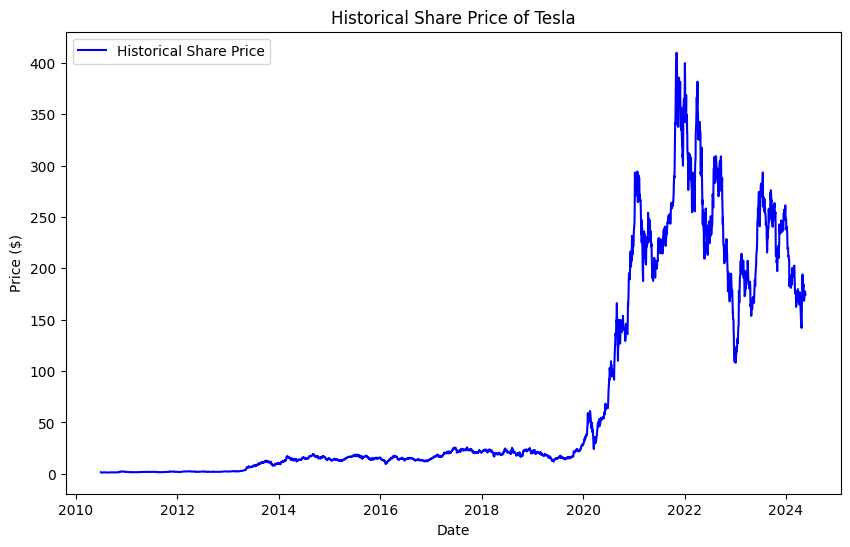

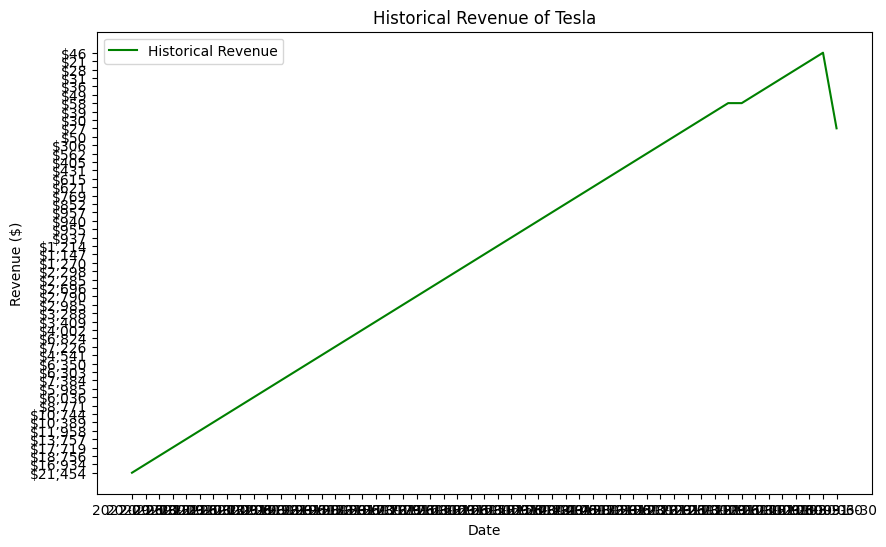

In [33]:
import matplotlib.pyplot as plt

def make_graph(stock_data, revenue_data, stock):
    # Plotting historical share price
    plt.figure(figsize=(10, 6))
    plt.plot(stock_data['Date'], stock_data['Close'], label='Historical Share Price', color='blue')
    plt.xlabel('Date')
    plt.ylabel('Price ($)')
    plt.title('Historical Share Price of ' + stock)
    plt.legend()
    
    # Plotting historical revenue
    plt.figure(figsize=(10, 6))
    plt.plot(revenue_data['Date'], revenue_data['Revenue'], label='Historical Revenue', color='green')
    plt.xlabel('Date')
    plt.ylabel('Revenue ($)')
    plt.title('Historical Revenue of ' + stock)
    plt.legend()

# Assuming you have tesla_data and tesla_revenue DataFrames
make_graph(tesla_data, tesla_revenue, 'Tesla')
plt.show()


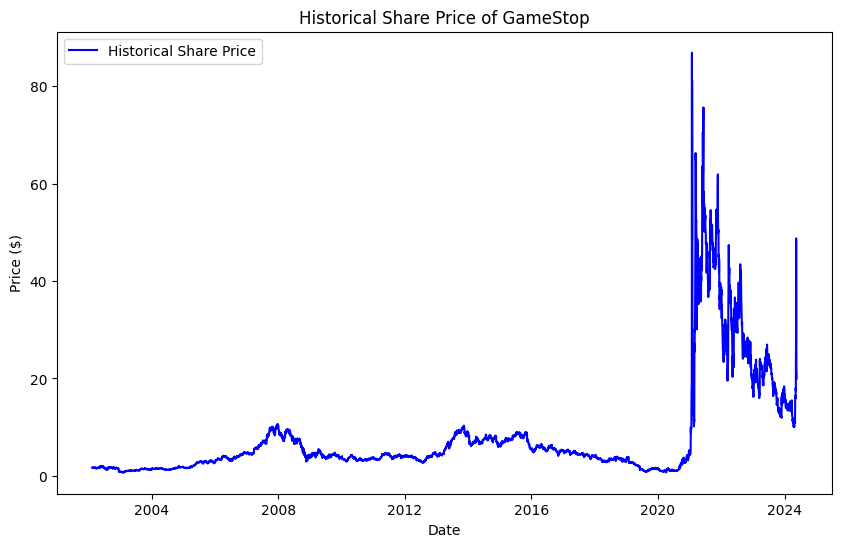

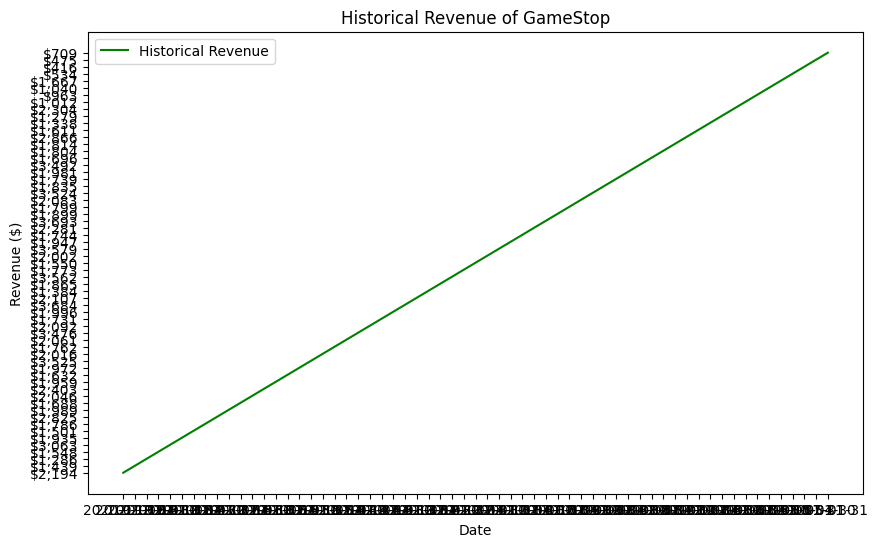

In [36]:
import matplotlib.pyplot as plt

def make_graph(stock_data, revenue_data, stock):
    # Plotting historical share price
    plt.figure(figsize=(10, 6))
    plt.plot(stock_data['Date'], stock_data['Close'], label='Historical Share Price', color='blue')
    plt.xlabel('Date')
    plt.ylabel('Price ($)')
    plt.title('Historical Share Price of ' + stock)
    plt.legend()
    
    # Plotting historical revenue
    plt.figure(figsize=(10, 6))
    plt.plot(revenue_data['Date'], revenue_data['Revenue'], label='Historical Revenue', color='green')
    plt.xlabel('Date')
    plt.ylabel('Revenue ($)')
    plt.title('Historical Revenue of ' + stock)
    plt.legend()

# Rename columns of gme_revenue DataFrame and set appropriate column names
gme_revenue.columns = ['Date', 'Revenue']

# Now call the make_graph function
make_graph(gme_data, gme_revenue, 'GameStop')
plt.show()

In [35]:
print("Columns of gme_data:")
print(gme_data.columns)

print("\nColumns of gme_revenue:")
print(gme_revenue.columns)

Columns of gme_data:
Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Dividends',
       'Stock Splits'],
      dtype='object')

Columns of gme_revenue:
Index(['2020-04-30', '$1,021'], dtype='object')
